In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [17]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.33, random_state=42)

pca = PCA()

pca.fit(X_train)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

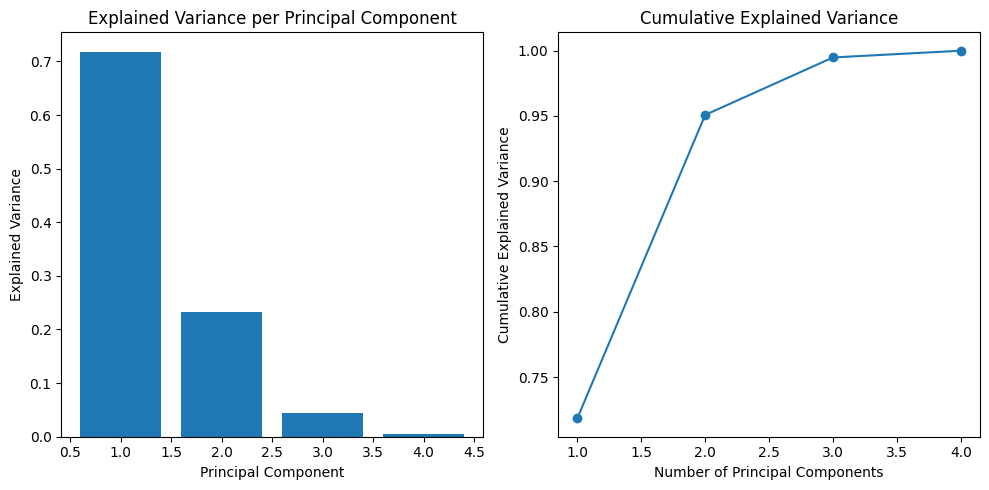

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance per Principal Component')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

In [19]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to explain at least 95% of the variance: {n_components}")

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Number of components to explain at least 95% of the variance: 2


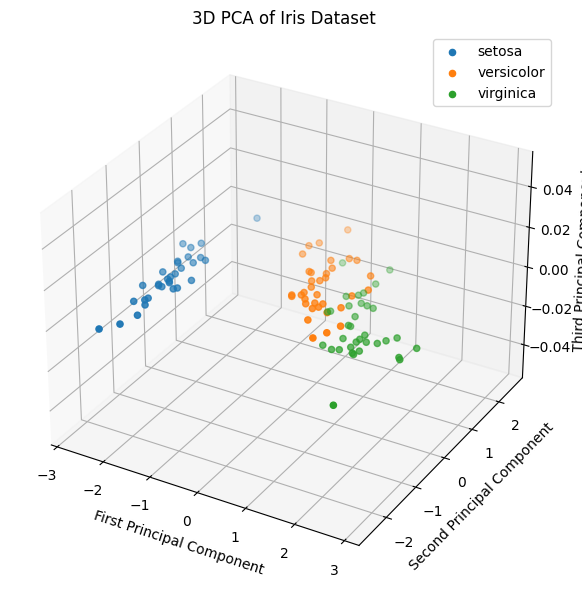

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for i, target_name in enumerate(iris.target_names):
    ax.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=target_name)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('3D PCA of Iris Dataset')
ax.legend()

plt.tight_layout()
plt.show()